# Continuous Ranked Probability Score (CRPS) for Ensembles

General information about the CRPS, and how to use `crps_cdf` with a forecast expressed as a cumulative distribution function (CDF), is available in the tutorial "Continuous Ranked Probability Score". 
We recommend you work through that tutorial before looking at the `crps_for_ensembles` and this tutorial.

In weather forecasting it is common to run an ensemble of deterministic models. Each ensemble member provides a deterministic forecast. The idea is that the combined ensemble forecasts can be used to estimate a PDF, and hence a CDF. 

The `crps_for_ensemble` function interprets ensemble forecast input as a CDF in one of two ways and calculates the CRPS as demonstrated below.

A CDF is a function of the probability of non-exceedence. It relevant to real-valued parameters such as temperature, rainfall amount, wind speed etc.

In [1]:
from scores.probability import crps_for_ensemble
import matplotlib.pyplot as plt

import numpy
import xarray

## Using the `crps_for_ensemble` function

In [2]:
# Uncomment the following line and run to read the documentation regarding the crps_for_ensemble function in scores.
# crps_for_ensemble?

For the purpose of this tutorial, we will create a set of 10 equally likely forecasts of temperature which we will compare to a single verifying observation.

In [3]:
# In this example, each ensemble member is given a name 0 to 9
ensemble_forecast = xarray.DataArray(
    [1.2, 2.0, 2.7, 2.9, 3.0, 3.0, 3.1, 3.2, 3.8, 5.0],
	coords=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], dims=["ensemble_member"])

# The observation is assumed to be 4.5
obs_array = xarray.DataArray(4.5)

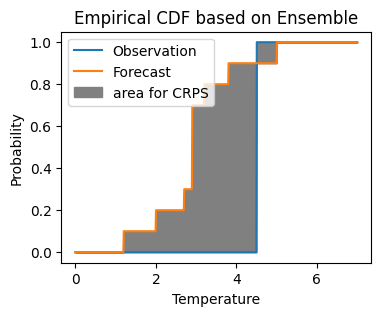

In [4]:
# The ensemble forecast can be converted to a CDF
# When converted in a naive way we get the empirical CDF illustrated here. The larger the ensemble the smoother and more sensible this will be.
# The plot below also shows the CDF corresponding to the observation, and the area corrsponding to the CRPS.
fcst_thresholds = numpy.linspace(0, 7, 700) 
empirical_cdf = xarray.DataArray(coords={'temperature': fcst_thresholds}, data=[0]*120 + [0.1]*80 + [0.2]*70 + [0.3]*20 +[0.7]*30 + [0.8]*60 + [0.9]*120 +[1]*200)
observed_cdf = numpy.heaviside(fcst_thresholds-4.5, 1)
plt.figure(figsize=(4, 3))
plt.plot(fcst_thresholds, observed_cdf, label='Observation')
plt.plot(fcst_thresholds, empirical_cdf, label='Forecast')
plt.fill_between(fcst_thresholds, empirical_cdf, observed_cdf, color='gray', label='area for CRPS')
plt.title("Empirical CDF based on Ensemble")
plt.xlabel("Temperature")
plt.ylabel("Probability")
plt.legend(loc="upper left")

In [5]:
# Specifying method='ecdf' assumes the empirical CDF
crps_for_ensemble(ensemble_forecast, obs_array, ensemble_member_dim='ensemble_member', method='ecdf').round(3)

<xarray.DataArray ()>
array(1.111)

In [6]:
# Specifying method='fair' gives an approximated CRPS assuming that the ensemble values can be interpreted as a random sample from an underlying predictive distribution
crps_for_ensemble(ensemble_forecast, obs_array, ensemble_member_dim='ensemble_member', method='fair').round(3)

<xarray.DataArray ()>
array(1.056)

### Things to try next

* Use crps_for_ensemble with some real forecasts with extra dimensions in space and/or time.   
* Read about the 'fair' method in C. Ferro (2014), "Fair scores for ensemble forecasts", Q J R Meteorol Soc
        140(683):1917-1923. https://doi.org/10.1002/qj.2270